# M3-L1 Problem 2 (6 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plot_data(data, c, title="", xlabel="$x_1$",ylabel="$x_2$",classes=["",""],alpha=1):
    N = len(c)
    colors = ['royalblue','crimson']
    symbols = ['o','s']
    
    plt.figure(figsize=(5,5),dpi=120)

    for i in range(2):
        x = data[:,0][c==i]
        y = data[:,1][c==i]

        plt.scatter(x,y,color=colors[i],marker=symbols[i],edgecolor="black",linewidths=0.4,label=classes[i],alpha=alpha)

    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.title(title)

def plot_contour(predict, mapXY = None):
    res = 500
    vals = np.linspace(-0.05,1.05,res)
    x,y = np.meshgrid(vals,vals)
    XY = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    if mapXY is not None:
        XY = mapXY(XY)
    contour = predict(XY).reshape(res, res)
    plt.contour(x, y, contour)


## Generate Dataset
#### (Don't edit this code.)

In [2]:
def get_line_dataset():
    np.random.seed(4)
    x = np.random.rand(90)
    y = np.random.rand(90)

    h = 1/.9*x + 1/0.9*y - 1

    d = 0.1
    x1, y1 = x[h<-d], y[h<-d]
    x2, y2 = x[np.abs(h)<d], y[np.abs(h)<d]
    x3, y3 = x[h>d], y[h>d]

    c1 = np.ones_like(x1)
    c2 = (np.random.rand(len(x2)) > 0.5).astype(int)
    c3 = np.zeros_like(x3)
    xs = np.concatenate([x1,x2,x3],0)
    print(xs)
    ys = np.concatenate([y1,y2,y3],0)
    c = np.concatenate([c1,c2,c3],0)
    return np.vstack([xs,ys]).T,c

[0.54723225 0.2160895  0.00623026 0.19768507 0.0089861  0.04416006
 0.43614665 0.54520265 0.52440408 0.40149544 0.17897391 0.68666708
 0.25367965 0.1824454  0.40482522 0.08466161 0.24545371 0.36365035
 0.04853414 0.48773764 0.51024363 0.25298236 0.43479153 0.17316542
 0.07494859 0.73338017 0.3969     0.62493084 0.43182207 0.90466759
 0.84544365 0.59726661 0.51473397 0.60356351 0.76775803 0.10981812
 0.96702984 0.97268436 0.71481599 0.69772882 0.97627445 0.77938292
 0.86299324 0.98340068 0.16384224 0.59733394 0.38657128 0.95665297
 0.94897731 0.78630599 0.8662893  0.60074272 0.16797218 0.40844386
 0.52790882 0.93757158 0.52169612 0.10819338 0.15822341 0.63761024
 0.64980511 0.62391611 0.76740497 0.37557577 0.50253306 0.55474086
 0.89550117 0.36285359 0.63755707 0.1914464  0.49779411 0.91838304
 0.8301881  0.4167763  0.3311745  0.57213877 0.86101431 0.59568812
 0.73259345 0.89465129 0.06506781 0.54007473 0.12918678 0.61456285
 0.68402322 0.5146537  0.57164137 0.84370699 0.81014442 0.9267

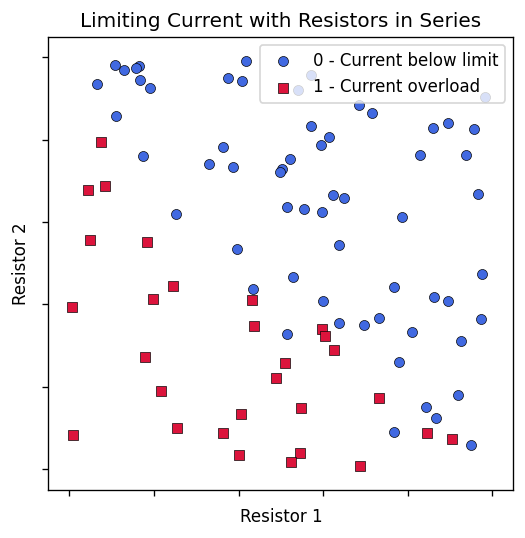

In [3]:
data, classes = get_line_dataset()
format = dict(title="Limiting Current with Resistors in Series", xlabel="Resistor 1", ylabel="Resistor 2", classes=["0 - Current below limit","1 - Current overload"])

plot_data(data, classes, **format)

## Define helper functions

First, fill in code to complete the following functions. You may use code you wrote in the previous question.
- `sigmoid(h)` to compute the sigmoid of an input `h`
- (Given) `transform(data, w)` to add a column of ones to `data` and then multiply by the 3-element vector `w`
- (Given) `loss(data,y,w)` to compute the logistic regression loss function:
$$ L(x,y,w) = \sum_{i=1}^n -y^{(i)} \cdot \ln(g(w'x^{(i)})) - (1 - y^{(i)}) \cdot \ln(1 - g(w'x^{(i)})) $$
- `gradloss(data,y,w)` to compute the gradient of the loss function with respect to w:
$$ \frac{\partial L}{w_j} = \sum_{i=1}^n (g(w'x^{(i)}) - y^{(i)}) x_j^{(i)}

In [4]:
def sigmoid(h):
    # YOUR CODE GOES HERE
    return 1/(1 + np.exp(-h))

def transform(data, w):
    xs = data[:,0]
    ys = data[:,1]
    ones = np.ones_like(xs)
    h = w[0]*ones + w[1]*xs + w[2]*ys
    return h

def loss(data, y, w):
    wt_x = transform(data,w)

    J1 = -np.log(sigmoid(wt_x)) * y
    J2 = -np.log(sigmoid(wt_x)) * (1-y)
    L = np.sum(J1 + J2)
    return L

def gradloss(data, y, w):
    # YOUR CODE GOES HERE
    xs = data[:,0]
    ys = data[:,1]
    ones = np.ones_like(xs).reshape(-1,1)
    Data = np.concatenate((ones,data),1) #(90,3)
    wt_x = transform(data,w)
    return np.sum((sigmoid(wt_x) - y).reshape(90,1)*Data,0)


## Gradient Descent

Now you'll write a gradient descent loop. Given a number of iterations and a step size, continually update `w` to minimize the loss function. Use the `gradloss` function you wrote to compute a gradient, then move `w` by `stepsize` in the direction opposite the gradient. Return the optimized `w`.

In [5]:
def grad_desc(data, y, w0=np.array([0,0,0]), iterations=100, stepsize=0.1):
    # YOUR CODE GOES HERE
    for i in range(iterations):
        w0 = w0 - stepsize * gradloss(data,y,w0)
    return w0

## Test your classifier

Run these cells to find the optimal `w`, compute the accuracy on the training data, and plot a decision boundary.

In [6]:
w = grad_desc(data,classes)
preds = np.round(sigmoid(transform(data, w))).astype(int)
accuracy = np.sum(preds == classes) / len(classes) * 100
print("          w = ", w)
print("True Classes: ", classes.astype(int))
print(" Predictions: ", preds)
print("    Accuracy: ", accuracy, r"%")

          w =  [ 7.99449326 -8.54560847 -9.92653181]
True Classes:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Accuracy:  91.11111111111111 %


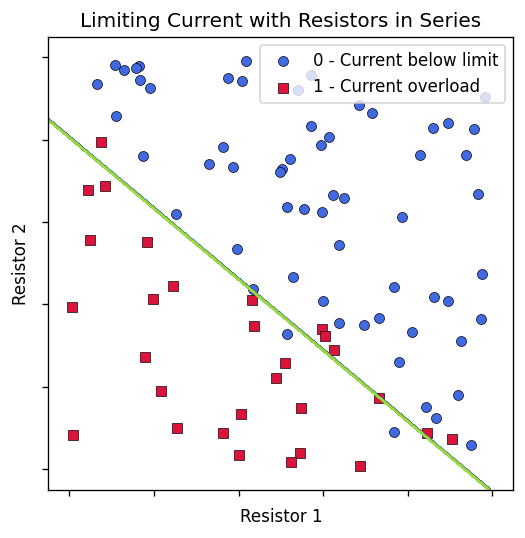

In [7]:
predict = lambda data: np.round(sigmoid(transform(data, w)))
plot_data(data, classes, **format)
plot_contour(predict)
plt.show()